<a href="https://colab.research.google.com/github/sajeenthan1/sajeenthan1/blob/main/Stroke%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
from tqdm import tqdm
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

In [ ]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.00,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,51676,Female,61.00,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.00,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
3,60182,Female,49.00,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
4,1665,Female,79.00,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


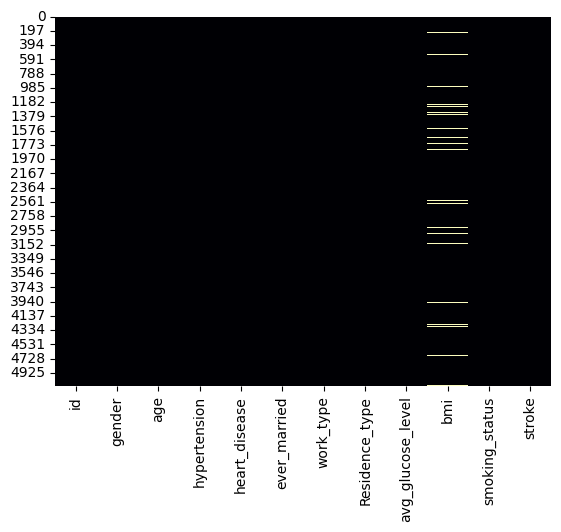

In [ ]:
sns.heatmap(data.isnull(),cmap = 'magma',cbar = False);

In [ ]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.00,5110.00,5110.00,5110.00,5110.00,4909.00,5110.00
mean,36517.83,43.23,0.10,0.05,106.15,28.89,0.05
std,21161.72,22.61,0.30,0.23,45.28,7.85,0.22
min,67.00,0.08,0.00,0.00,55.12,10.30,0.00
25%,17741.25,25.00,0.00,0.00,77.25,23.50,0.00
50%,36932.00,45.00,0.00,0.00,91.88,28.10,0.00
75%,54682.00,61.00,0.00,0.00,114.09,33.10,0.00
max,72940.00,82.00,1.00,1.00,271.74,97.60,1.00


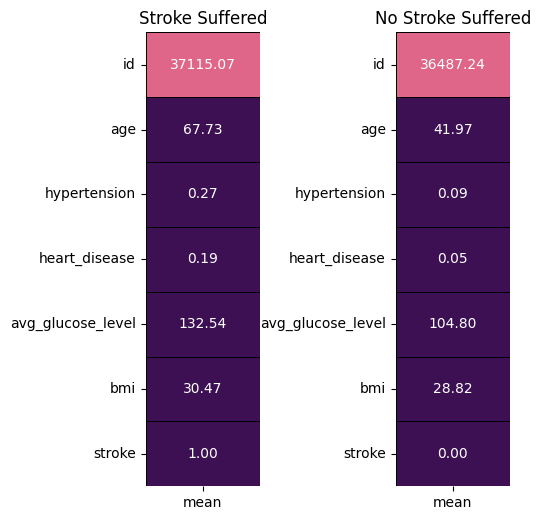

In [ ]:
stroke = data[data['stroke'] == 1].describe().T
no_stroke = data[data['stroke'] == 0].describe().T

colors = ['#3C1053','#DF6589']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(stroke[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Stroke Suffered');

plt.subplot(1,2,2)
sns.heatmap(no_stroke[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Stroke Suffered');

fig.tight_layout(pad = 0)

In [ ]:
l1 = [i for i in tqdm(range(len(data.isnull()['bmi']))) if data.isnull().loc[i,'bmi'] == True]
print('Total Number of Missing Values in bmi feature :', len(l1))

100%|██████████| 5110/5110 [00:10<00:00, 509.63it/s]

Total Number of Missing Values in bmi feature : 201


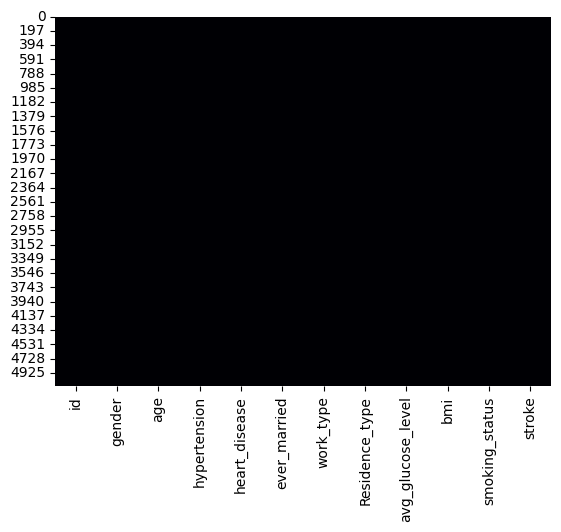

In [ ]:
data['bmi'].fillna(data['bmi'].mean(),inplace = True)
sns.heatmap(data.isnull(),cmap = 'magma',cbar = False);

In [ ]:
data.drop(columns = ['id'],inplace = True)
col = list(data.columns)
categorical_features = []
discrete_features = []
for i in col:
    if len(data[i].unique()) > 6:
        discrete_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Discrete Features :',*discrete_features)

data['age'] = data['age'].astype(int)
df1 = data.copy(deep = True)

Categorical Features : gender hypertension heart_disease ever_married work_type Residence_type smoking_status stroke
Discrete Features : age avg_glucose_level bmi


In [ ]:
le = LabelEncoder()
text_data_features = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
l3 = []; l4 = [];
print('Label Encoder Transformation')
for i in tqdm(text_data_features):
    df1[i] = le.fit_transform(df1[i])
    l3.append(list(df1[i].unique())); l4.append(list(le.inverse_transform(df1[i].unique())))
    print(i,' : ',df1[i].unique(),' = ',le.inverse_transform(df1[i].unique()))

Label Encoder Transformation


100%|██████████| 5/5 [00:00<00:00, 38.79it/s]

gender  :  [1 0 2]  =  ['Male' 'Female' 'Other']
ever_married  :  [1 0]  =  ['Yes' 'No']
work_type  :  [2 3 0 4 1]  =  ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type  :  [1 0]  =  ['Urban' 'Rural']
smoking_status  :  [1 2 3 0]  =  ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [ ]:
tf1 = {}
for i in range(len(text_data_features)):
    tf1[text_data_features[i]] = {}
    for j,k in zip(l3[i],l4[i]):
        tf1[text_data_features[i]][j] = k

tf1['hypertension'] = {0 : 'No Hypertension', 1 : 'Hypertension'}
tf1['heart_disease'] = {0 : 'No Heart Disease', 1 : 'Heart Disease'}
tf1

{'gender': {1: 'Male', 0: 'Female', 2: 'Other'},
 'ever_married': {1: 'Yes', 0: 'No'},
 'work_type': {2: 'Private',
  3: 'Self-employed',
  0: 'Govt_job',
  4: 'children',
  1: 'Never_worked'},
 'Residence_type': {1: 'Urban', 0: 'Rural'},
 'smoking_status': {1: 'formerly smoked',
  2: 'never smoked',
  3: 'smokes',
  0: 'Unknown'},
 'hypertension': {0: 'No Hypertension', 1: 'Hypertension'},
 'heart_disease': {0: 'No Heart Disease', 1: 'Heart Disease'}}

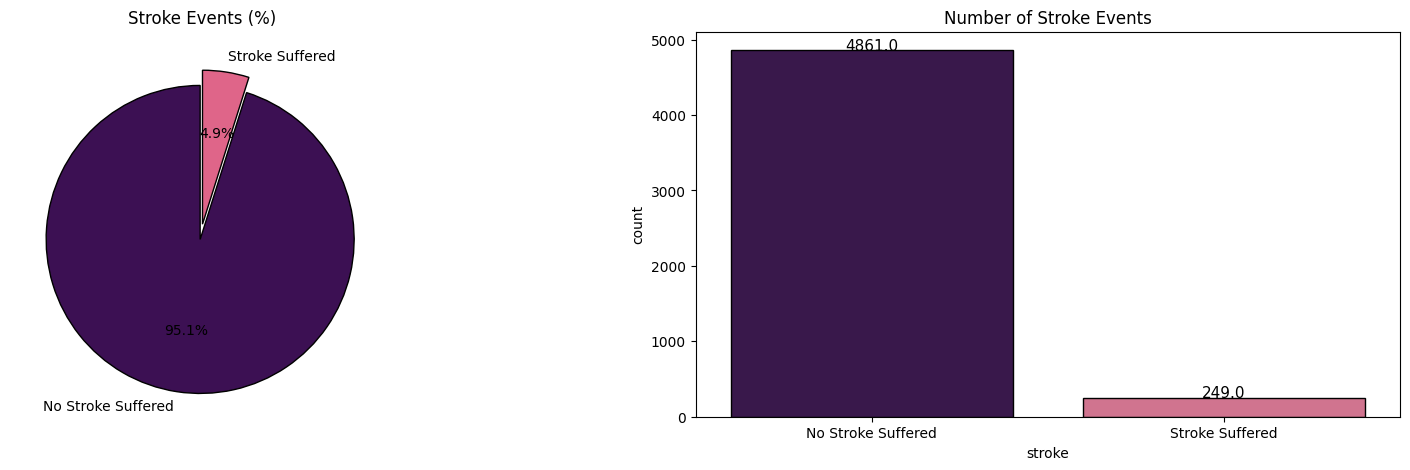

In [ ]:
l = list(df1['stroke'].value_counts())
circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(circle,labels = ['No Stroke Suffered','Stroke Suffered'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Stroke Events (%)');
plt.subplot(1,2,2)
ax = sns.countplot(x='stroke', data=df1, palette=colors, edgecolor='black') # Pass 'stroke' as the 'x' argument
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['No Stroke Suffered','Stroke Suffered'])
plt.title('Number of Stroke Events');
plt.show()


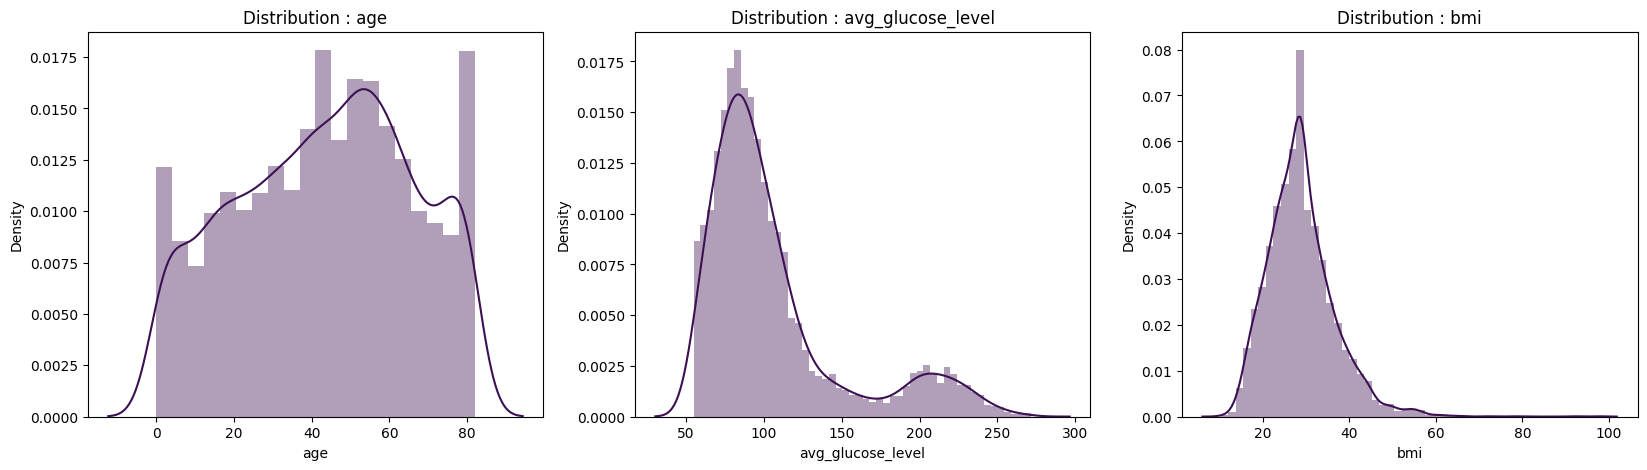

In [ ]:
fig, ax = plt.subplots(nrows = 1,ncols = 3,figsize = (20,5))
for i in range(len(discrete_features)):
    plt.subplot(1,3,i+1)
    sns.distplot(df1[discrete_features[i]],color = colors[0])
    title = 'Distribution : ' + discrete_features[i]
    plt.title(title)
plt.show()

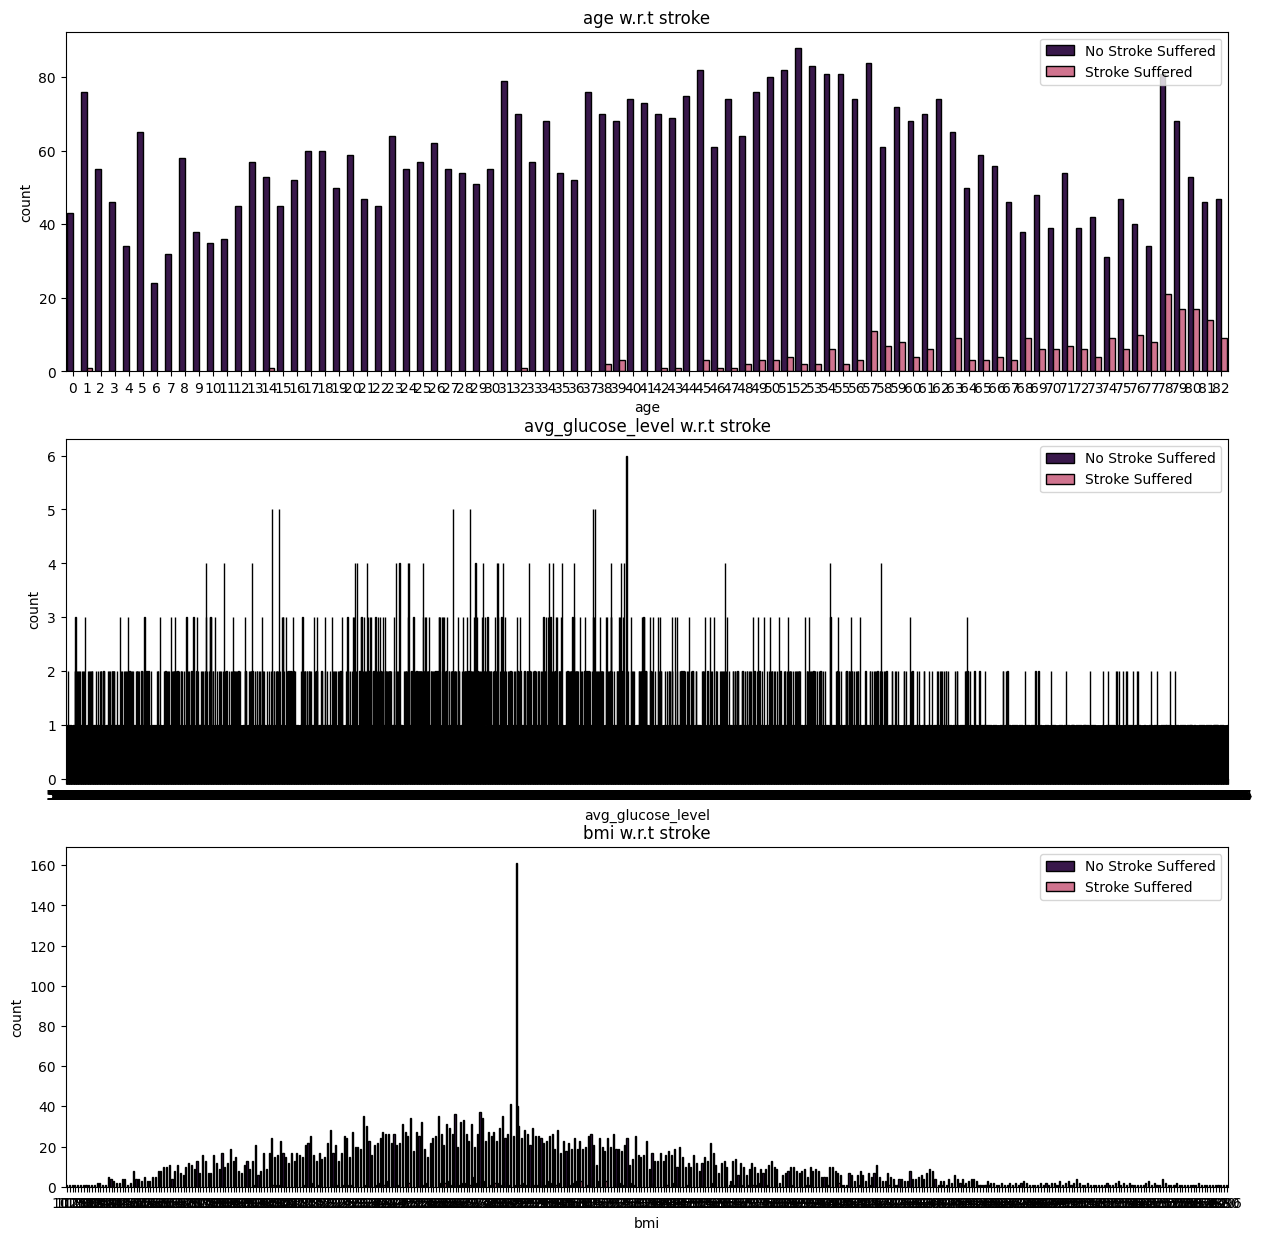

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15, 15))
for i in range(len(discrete_features)):
    plt.subplot(3, 1, i + 1)
    # Explicitly specify 'x' argument
    sns.countplot(x=discrete_features[i], data=df1, hue="stroke", palette=colors, edgecolor='black')
    plt.legend(['No Stroke Suffered', 'Stroke Suffered'], loc='upper right')
    title = discrete_features[i] + ' w.r.t stroke'
    plt.title(title)

In [ ]:
df1['age_group'] = [ int(i / 5) for i in df1['age']]
df1['avg_glucose_level_group'] = [ int(i / 20) for i in df1['avg_glucose_level']]
df1['bmi_group'] = [ int(i / 5) for i in df1['bmi']]

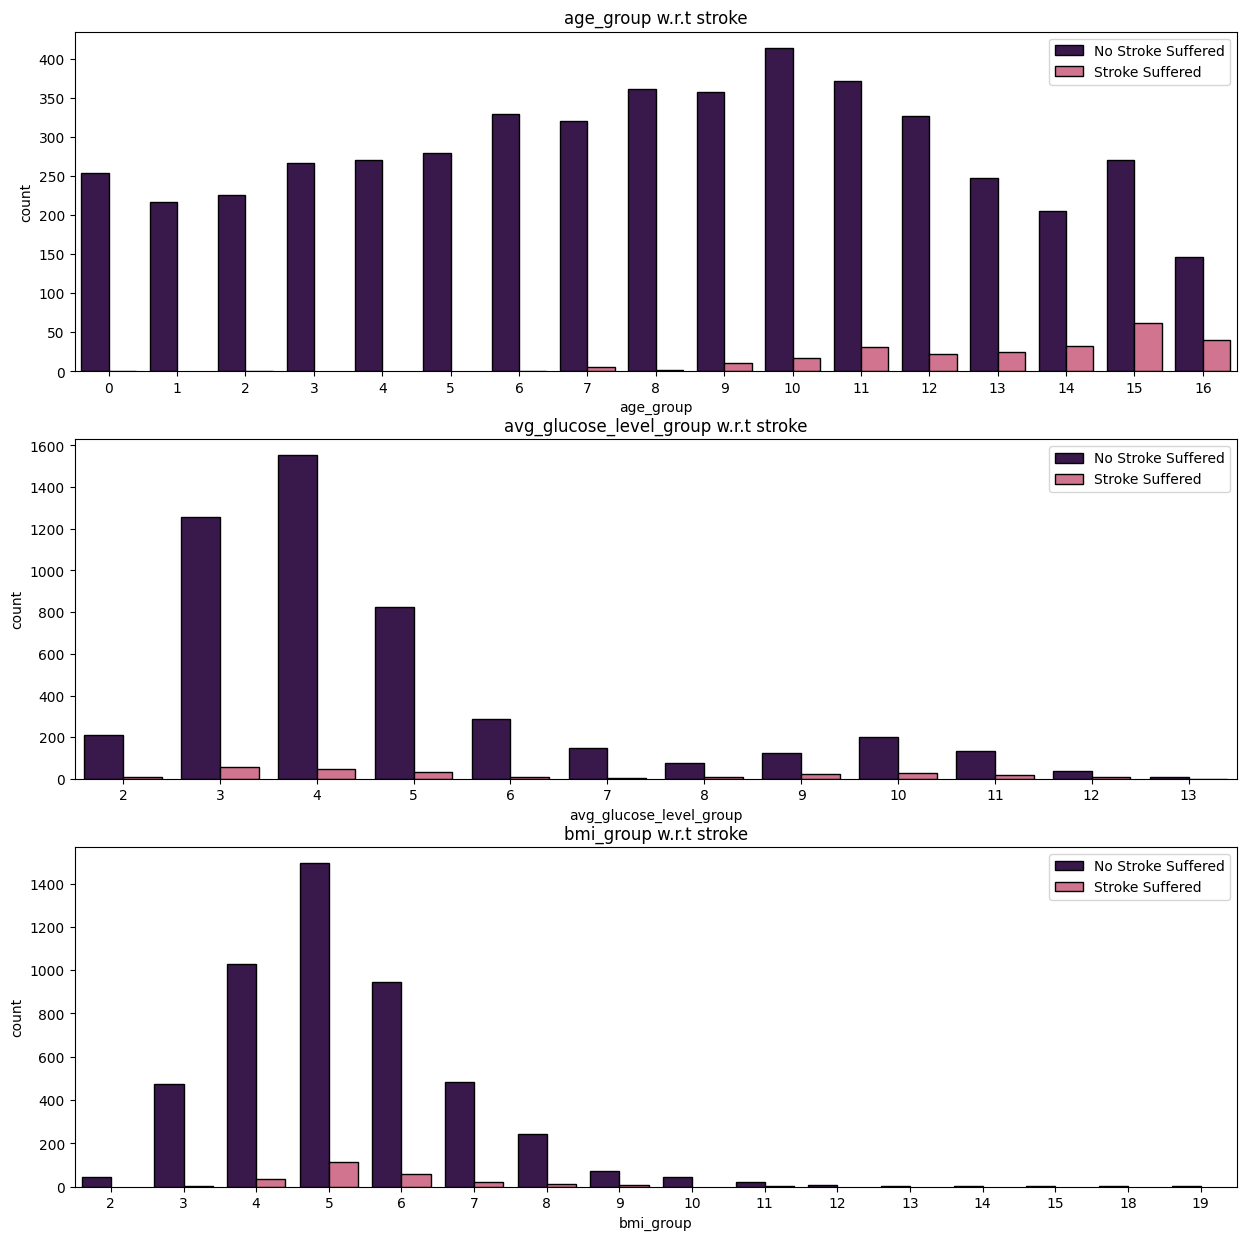

In [ ]:
fig, ax = plt.subplots(nrows = 3,ncols = 1,figsize = (15,15))
group_numerical_features = [i + '_group' for i in ['age','avg_glucose_level','bmi']]

for i in range(len(group_numerical_features)):
    plt.subplot(3,1,i+1)
    # Pass the column name as the 'x' argument and the DataFrame as 'data'
    sns.countplot(x=group_numerical_features[i], data=df1, hue="stroke", palette=colors, edgecolor='black')
    plt.legend(['No Stroke Suffered', 'Stroke Suffered'] ,loc = 'upper right')
    title = group_numerical_features[i] + ' w.r.t stroke'
    plt.title(title);

In [ ]:
categorical_features.remove('stroke')

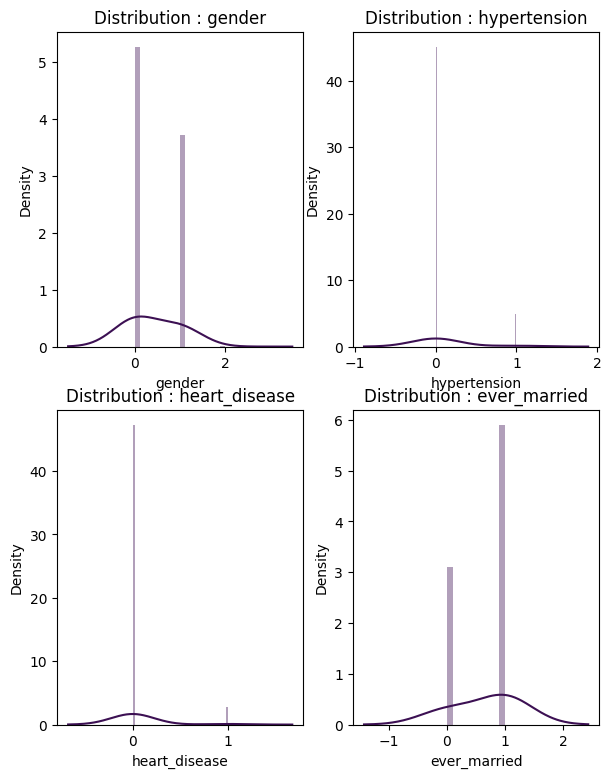

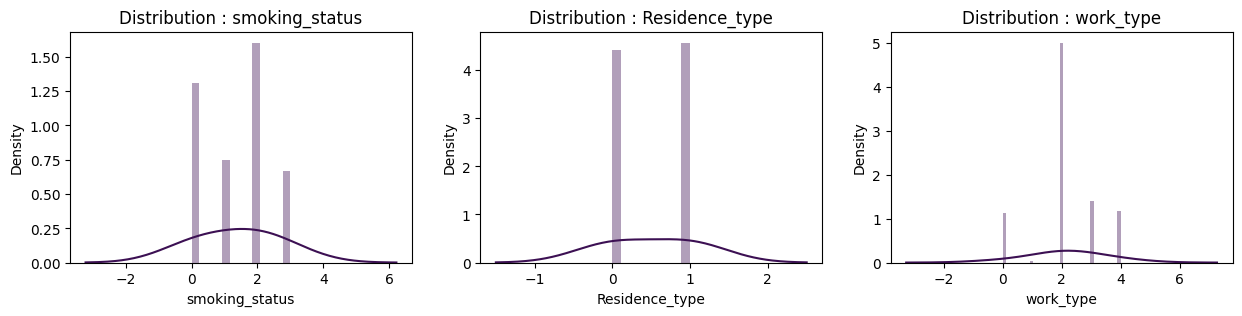

In [ ]:
fig, ax = plt.subplots(nrows = 2,ncols = 2,figsize = (7,9))
for i in range(len(categorical_features[:4])):
    plt.subplot(2,2,i+1)
    sns.distplot(df1[categorical_features[i]],kde_kws = {'bw' : 1},color = colors[0]);
    title = 'Distribution : ' + categorical_features[i]
    plt.title(title)

fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,3))
for i in range(-1,-4,-1):
    plt.subplot(1,3,-i)
    sns.distplot(df1[categorical_features[i]],kde_kws = {'bw' : 1},color = colors[0]);
    title = 'Distribution : ' + categorical_features[i]
    plt.title(title)

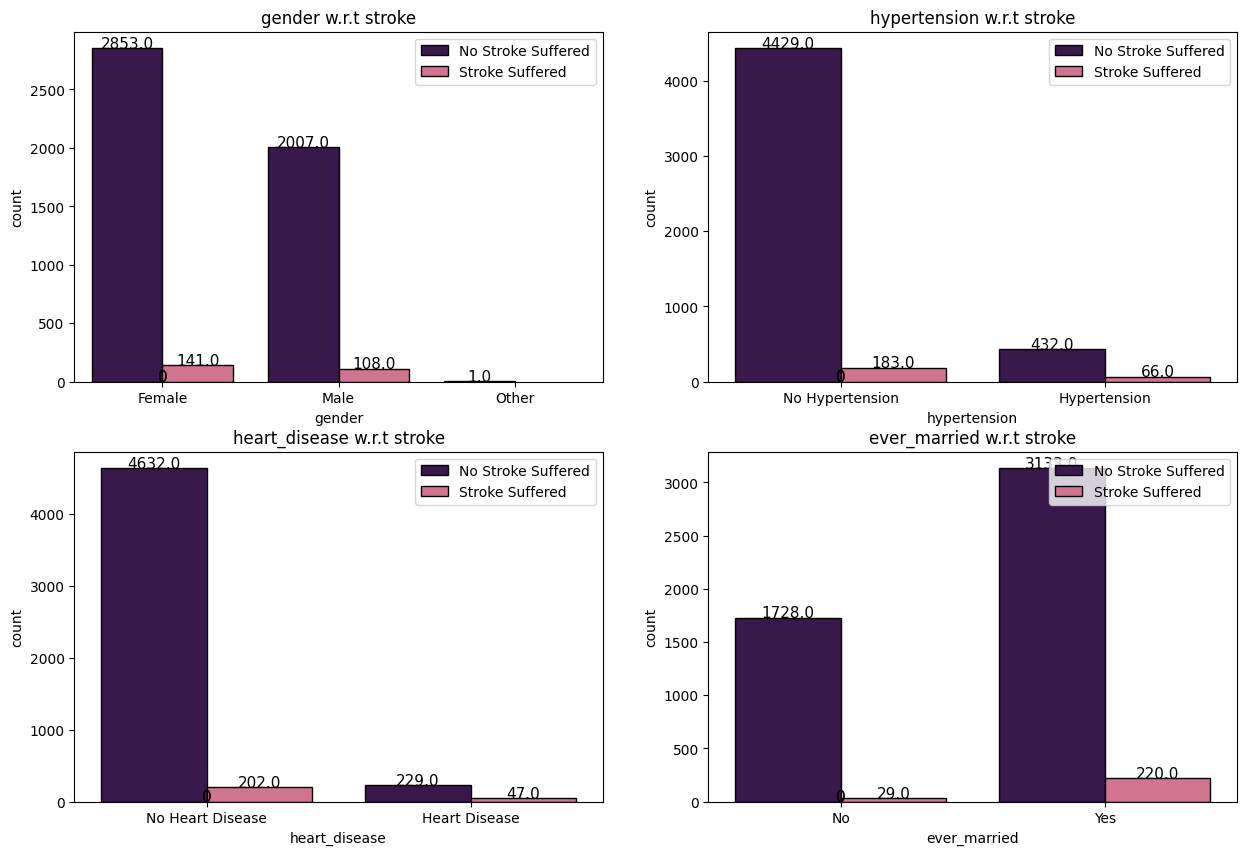

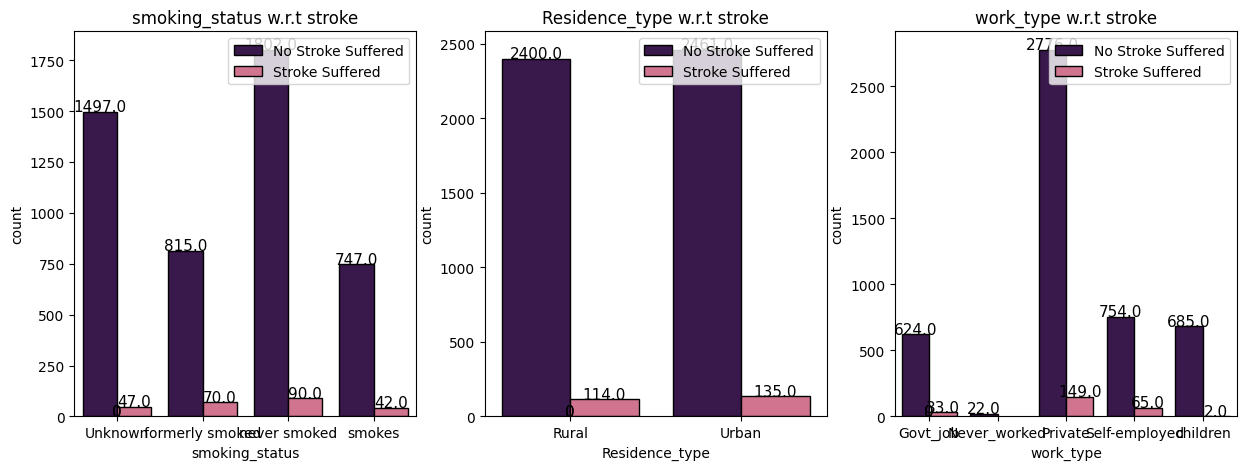

In [ ]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (15,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    # Pass the column name as the 'x' argument
    ax = sns.countplot(x=categorical_features[i], data=df1, hue="stroke", palette=colors, edgecolor='black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    ax.set_xticklabels([tf1[categorical_features[i]][j] for j in sorted(df1[categorical_features[i]].unique())])
    plt.legend(['No Stroke Suffered', 'Stroke Suffered'], loc = 'upper right')
    title = categorical_features[i] + ' w.r.t stroke'
    plt.title(title);

fig = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(-1,-4,-1):
    plt.subplot(1,3,-i)
    # Pass the column name as the 'x' argument
    ax = sns.countplot(x=categorical_features[i], data=df1, hue="stroke", palette=colors, edgecolor='black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    ax.set_xticklabels([tf1[categorical_features[i]][j] for j in sorted(df1[categorical_features[i]].unique())])
    plt.legend(['No Stroke Suffered', 'Stroke Suffered'], loc = 'upper right')
    title = categorical_features[i] + ' w.r.t stroke'
    plt.title(title);

In [ ]:
gender = df1[df1['stroke'] == 1]['gender'].value_counts()
gender = [gender[0] / sum(gender) * 100, gender[1] / sum(gender) * 100]

hypertension = df1[df1['stroke'] == 1]['hypertension'].value_counts()
hypertension = [hypertension[0] / sum(hypertension) * 100, hypertension[1] / sum(hypertension) * 100]

heart_disease = df1[df1['stroke'] == 1]['heart_disease'].value_counts()
heart_disease = [heart_disease[0] / sum(heart_disease) * 100, heart_disease[1] / sum(heart_disease) * 100]

ever_married = df1[df1['stroke'] == 1]['ever_married'].value_counts()
ever_married = [ever_married[0] / sum(ever_married) * 100, ever_married[1] / sum(ever_married) * 100]

work_type = df1[df1['stroke'] == 1]['work_type'].value_counts()
work_type = [work_type[0] / sum(work_type) * 100, work_type[2] / sum(work_type) * 100,
             work_type[3] / sum(work_type) * 100, work_type[4] / sum(work_type) * 100,]

Residence_type = df1[df1['stroke'] == 1]['Residence_type'].value_counts()
Residence_type = [Residence_type[0] / sum(Residence_type) * 100, Residence_type[1] / sum(Residence_type) * 100]

smoking_status = df1[df1['stroke'] == 1]['smoking_status'].value_counts()
smoking_status = [smoking_status[0] / sum(smoking_status) * 100, smoking_status[1] / sum(smoking_status) * 100,
                  smoking_status[2] / sum(smoking_status) * 100, smoking_status[3] / sum(smoking_status) * 100]

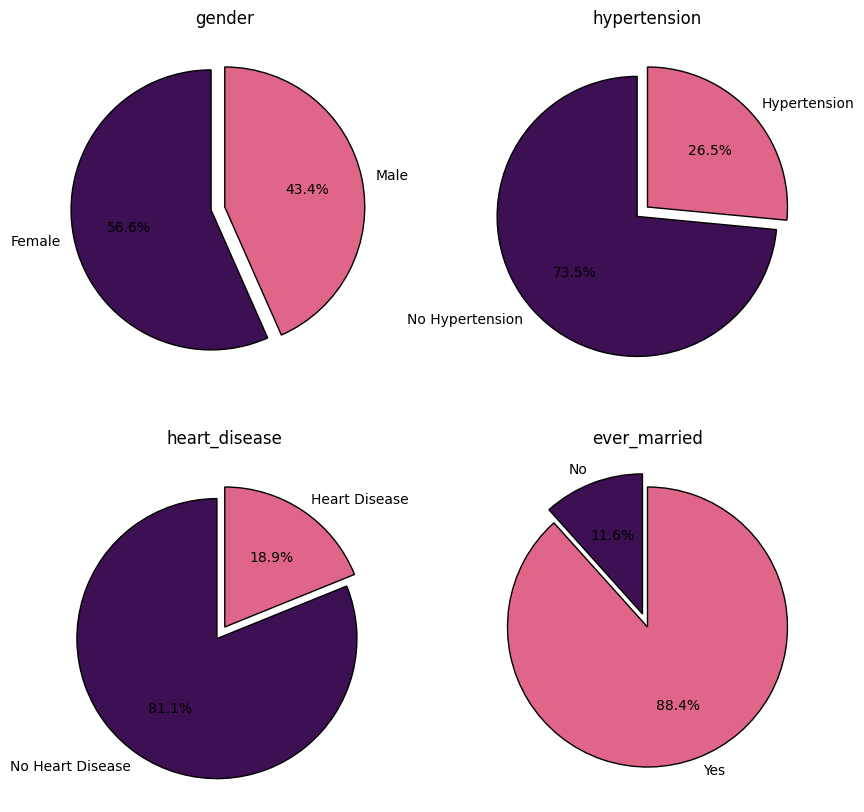

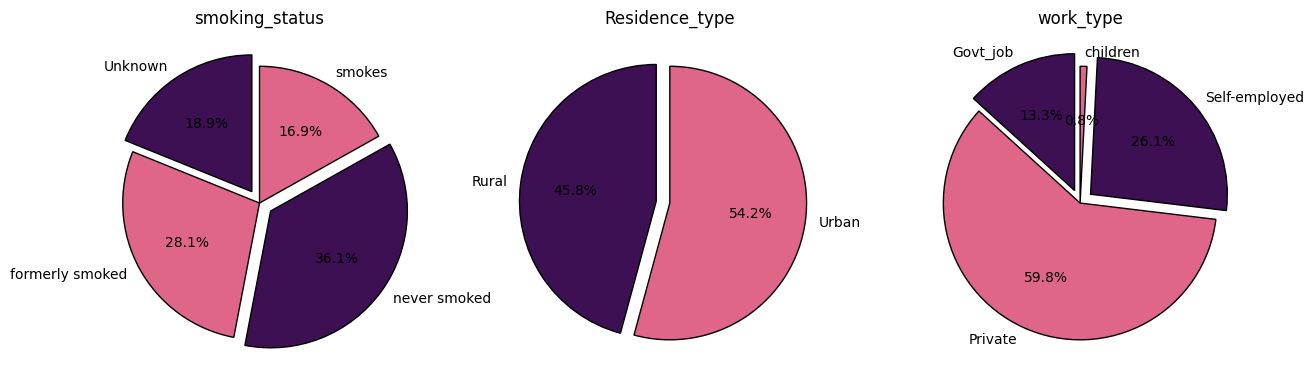

In [ ]:
l1 = [gender, hypertension, heart_disease, ever_married, work_type, Residence_type, smoking_status]

ax,fig = plt.subplots(nrows = 2,ncols = 2,figsize = (10,10))
for i in range(4):
    if len(l1[i]) == 2:
        plt.subplot(2,2,i + 1)
        plt.pie(l1[i],labels = [tf1[categorical_features[i]][j] for j in sorted(df1[df1['stroke'] == 1][categorical_features[i]].unique())],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
               wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
        plt.title(categorical_features[i]);
    else:
        plt.subplot(2,2,i + 1)
        plt.pie(l1[i],labels = [tf1[categorical_features[i]][j] for j in sorted(df1[df1['stroke'] == 1][categorical_features[i]].unique())],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1,0),colors = colors,
               wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
        plt.title(categorical_features[i]);

ax,fig = plt.subplots(nrows = 1,ncols = 3,figsize = (15,15))
for i in range(-1,-4,-1):
    if len(l1[i]) == 2:
        plt.subplot(1,3,-i)
        plt.pie(l1[i],labels = [tf1[categorical_features[i]][j] for j in sorted(df1[df1['stroke'] == 1][categorical_features[i]].unique())],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
               wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
        plt.title(categorical_features[i]);
    else:
        plt.subplot(1,3,-i)
        plt.pie(l1[i],labels = [tf1[categorical_features[i]][j] for j in sorted(df1[df1['stroke'] == 1][categorical_features[i]].unique())],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1,0),colors = colors,
               wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
        plt.title(categorical_features[i]);

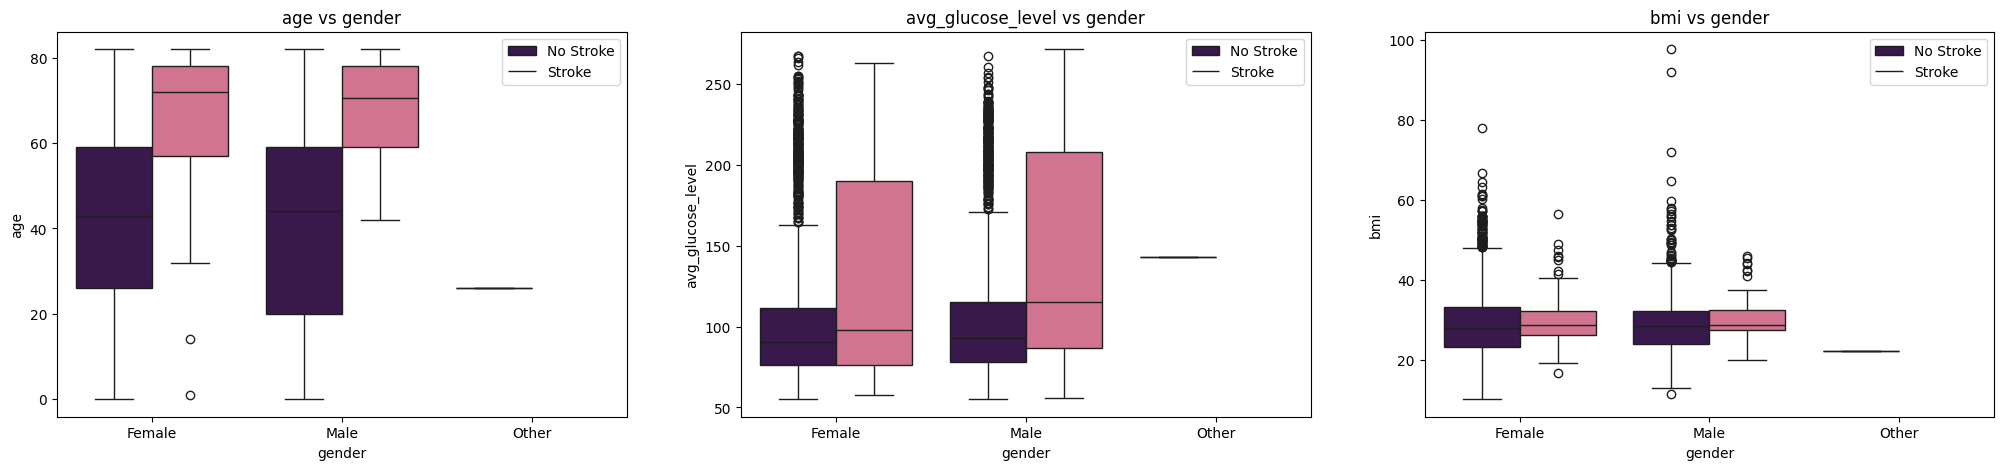

In [ ]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,5))
for i in range(len(discrete_features)):
    plt.subplot(1,3,i+1)
    ax = sns.boxplot(x = 'gender',y = discrete_features[i],data = df1,hue = 'stroke',palette = colors);
    ax.set_xticklabels([tf1['gender'][j] for j in sorted(df1['gender'].unique())])
    title = discrete_features[i] + ' vs gender'
    plt.legend(['No Stroke','Stroke'], loc = 'upper right')
    plt.title(title);

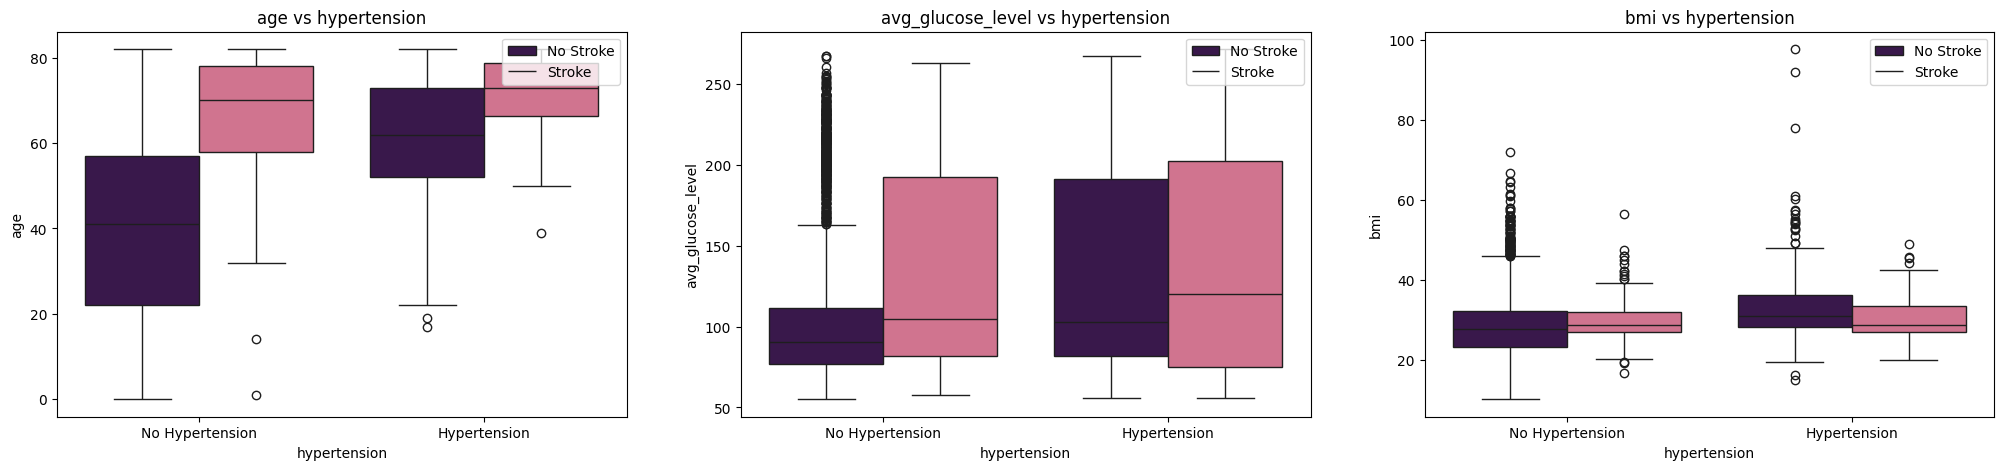

In [ ]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,5))
for i in range(len(discrete_features)):
    plt.subplot(1,3,i+1)
    ax = sns.boxplot(x = 'hypertension',y = discrete_features[i],data = df1,hue = 'stroke',palette = colors);
    ax.set_xticklabels([tf1['hypertension'][j] for j in sorted(df1['hypertension'].unique())])
    title = discrete_features[i] + ' vs hypertension'
    plt.legend(['No Stroke','Stroke'], loc = 'upper right')
    plt.title(title);

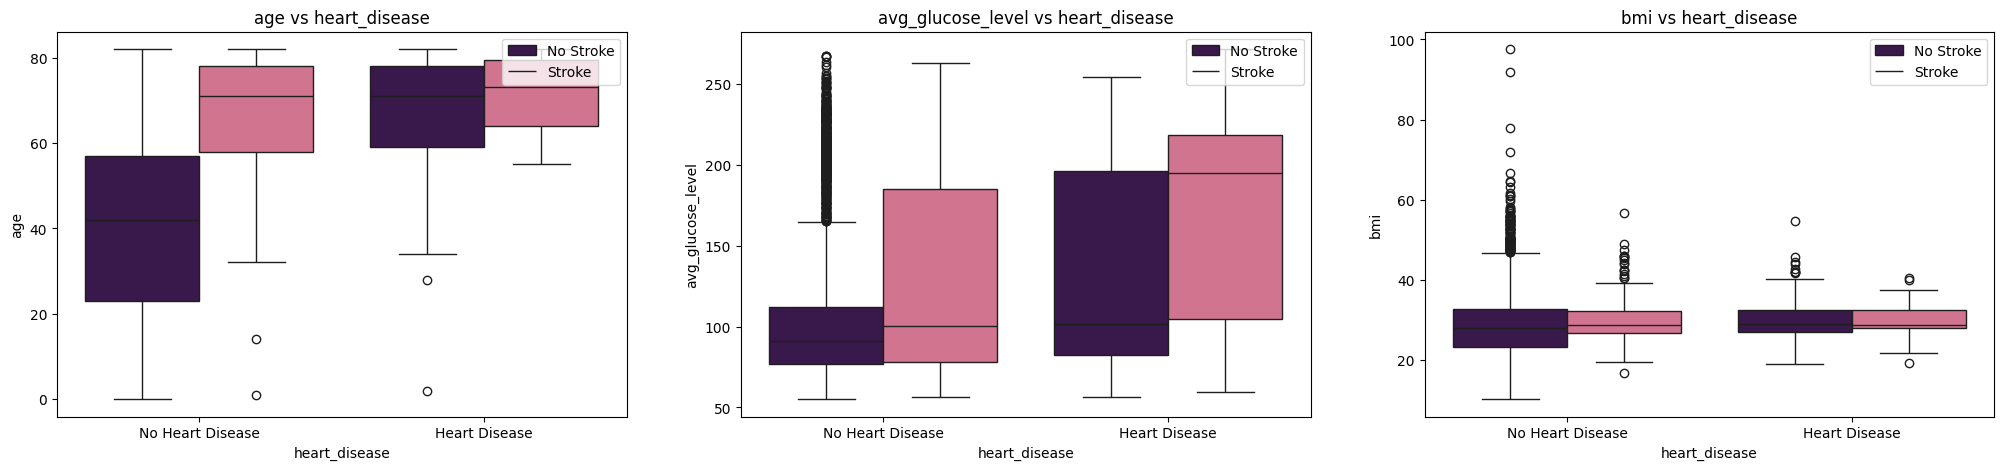

In [ ]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,5))
for i in range(len(discrete_features)):
    plt.subplot(1,3,i+1)
    ax = sns.boxplot(x = 'heart_disease',y = discrete_features[i],data = df1,hue = 'stroke',palette = colors);
    ax.set_xticklabels([tf1['heart_disease'][j] for j in sorted(df1['heart_disease'].unique())])
    title = discrete_features[i] + ' vs heart_disease'
    plt.legend(['No Stroke','Stroke'], loc = 'upper right')
    plt.title(title);

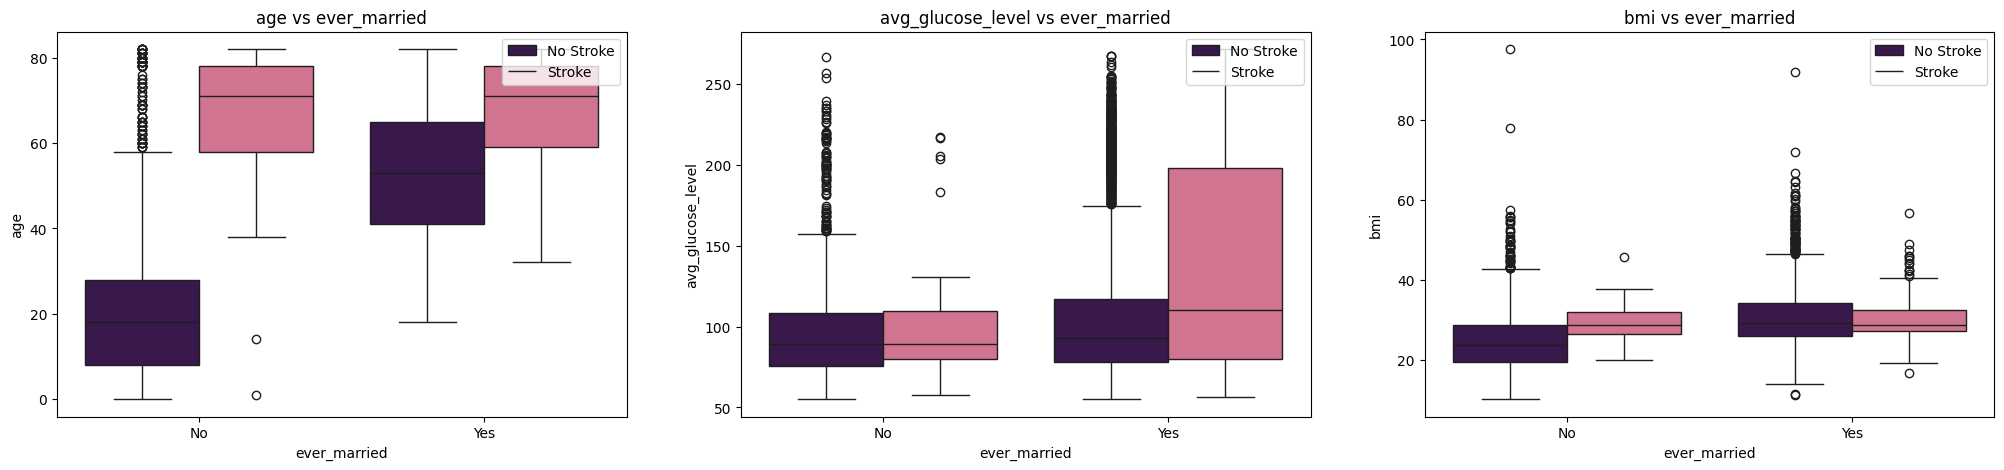

In [ ]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,5))
for i in range(len(discrete_features)):
    plt.subplot(1,3,i+1)
    ax = sns.boxplot(x = 'ever_married',y = discrete_features[i],data = df1,hue = 'stroke',palette = colors);
    ax.set_xticklabels([tf1['ever_married'][j] for j in sorted(df1['ever_married'].unique())])
    title = discrete_features[i] + ' vs ever_married'
    plt.legend(['No Stroke','Stroke'], loc = 'upper right')
    plt.title(title);

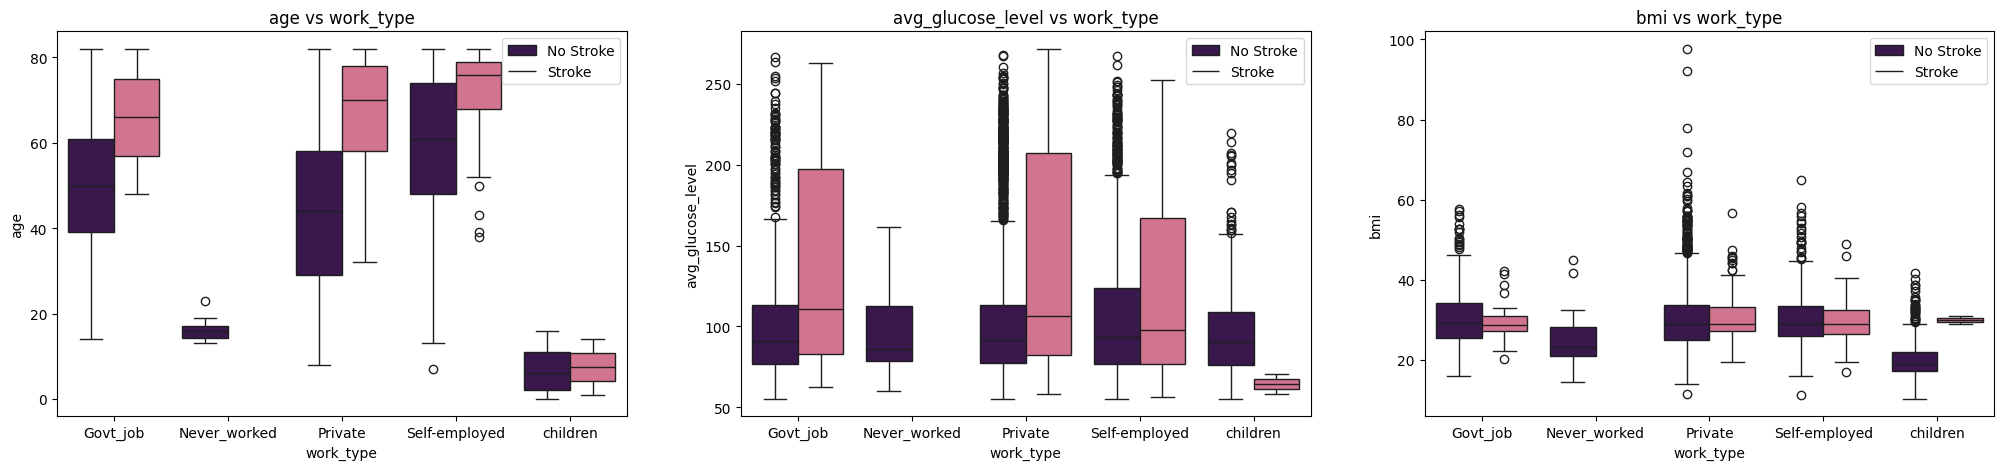

In [ ]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,5))
for i in range(len(discrete_features)):
    plt.subplot(1,3,i+1)
    ax = sns.boxplot(x = 'work_type',y = discrete_features[i],data = df1,hue = 'stroke',palette = colors);
    ax.set_xticklabels([tf1['work_type'][j] for j in sorted(df1['work_type'].unique())])
    title = discrete_features[i] + ' vs work_type'
    plt.legend(['No Stroke','Stroke'], loc = 'upper right')
    plt.title(title);

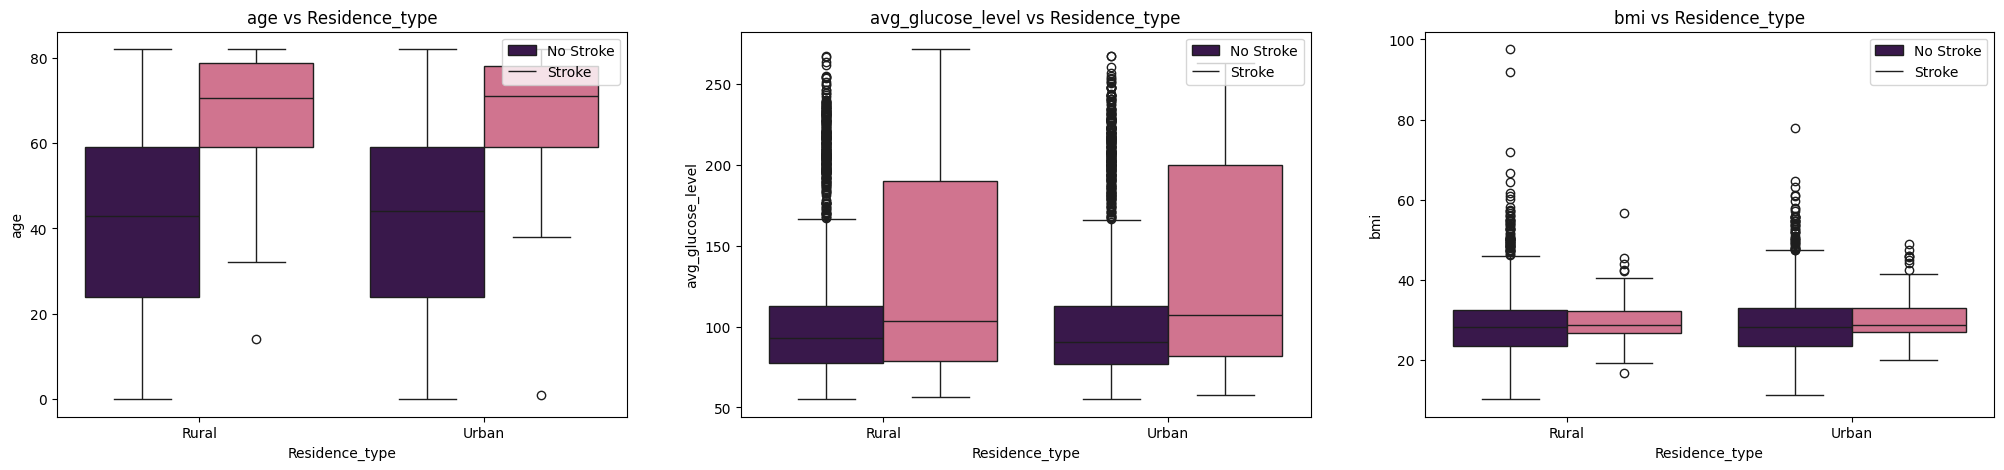

In [ ]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,5))
for i in range(len(discrete_features)):
    plt.subplot(1,3,i+1)
    ax = sns.boxplot(x = 'Residence_type',y = discrete_features[i],data = df1,hue = 'stroke',palette = colors);
    ax.set_xticklabels([tf1['Residence_type'][j] for j in sorted(df1['Residence_type'].unique())])
    title = discrete_features[i] + ' vs Residence_type'
    plt.legend(['No Stroke','Stroke'], loc = 'upper right')
    plt.title(title);

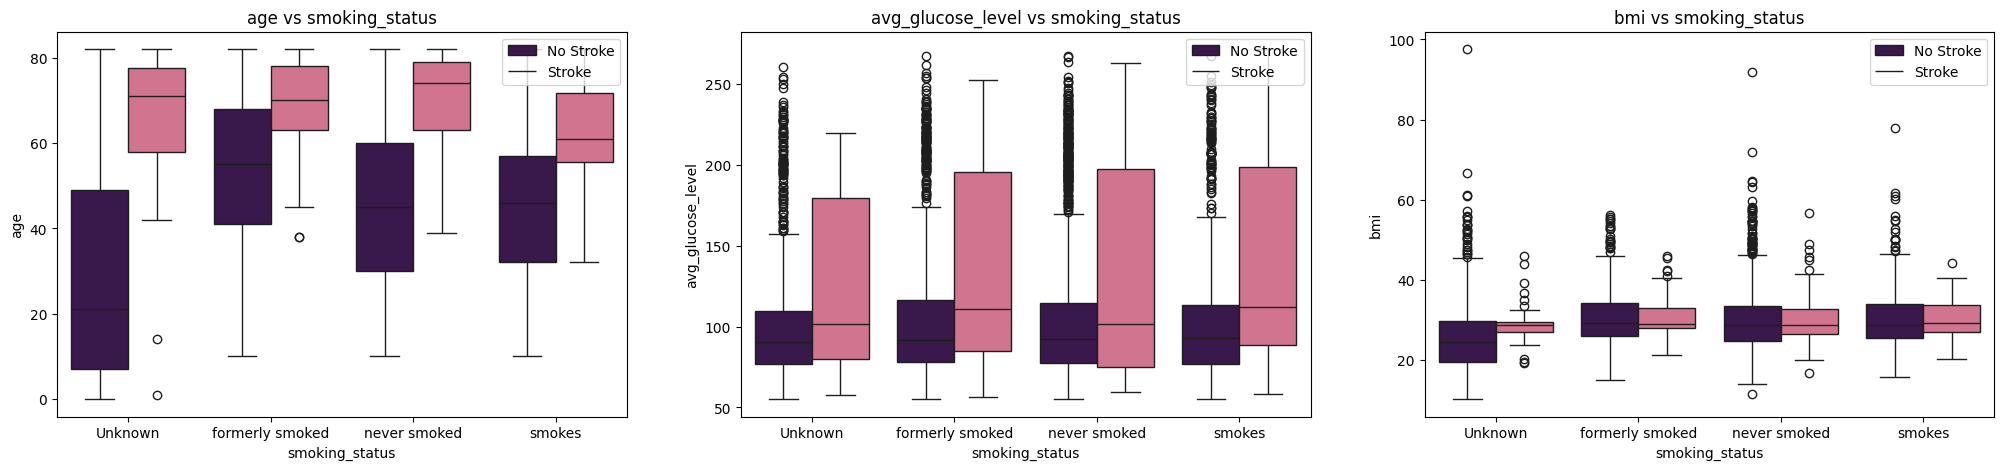

In [ ]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,5))
for i in range(len(discrete_features)):
    plt.subplot(1,3,i+1)
    ax = sns.boxplot(x = 'smoking_status',y = discrete_features[i],data = df1,hue = 'stroke',palette = colors);
    ax.set_xticklabels([tf1['smoking_status'][j] for j in sorted(df1['smoking_status'].unique())])
    title = discrete_features[i] + ' vs smoking_status'
    plt.legend(['No Stroke','Stroke'], loc = 'upper right')
    plt.title(title);

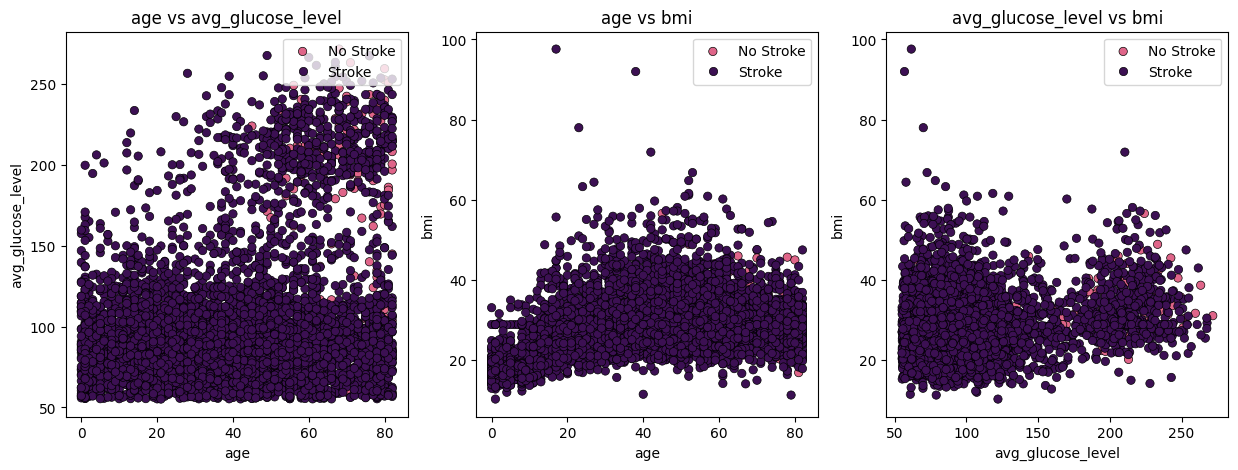

In [ ]:
a = 0
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5),squeeze = False)
for i in range(len(discrete_features) - 1):
    for j in range(len(discrete_features)):
        if i != j and j > i:
            a += 1
            plt.subplot(1,3,a)
            sns.scatterplot(x = discrete_features[i],y = discrete_features[j],data = df1,hue = 'stroke',palette = colors,edgecolor = 'black');
            title = discrete_features[i] + ' vs ' + discrete_features[j]
            plt.legend(['No Stroke','Stroke'], loc = 'upper right',)
            plt.title(title)

In [ ]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [ ]:
over = SMOTE(sampling_strategy = 1)
under = RandomUnderSampler(sampling_strategy = 0.1)
f1 = df1.loc[:,:'smoking_status']
t1 = df1.loc[:,'stroke']

steps = [('under', under),('over', over)]
pipeline = Pipeline(steps=steps)
f1, t1 = pipeline.fit_resample(f1, t1)
Counter(t1)

Counter({0: 2490, 1: 2490})

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(f1, t1, test_size = 0.15, random_state = 2)

In [ ]:
x_train_test = x_train.copy(deep = True)
x_train_test['stroke'] = y_train

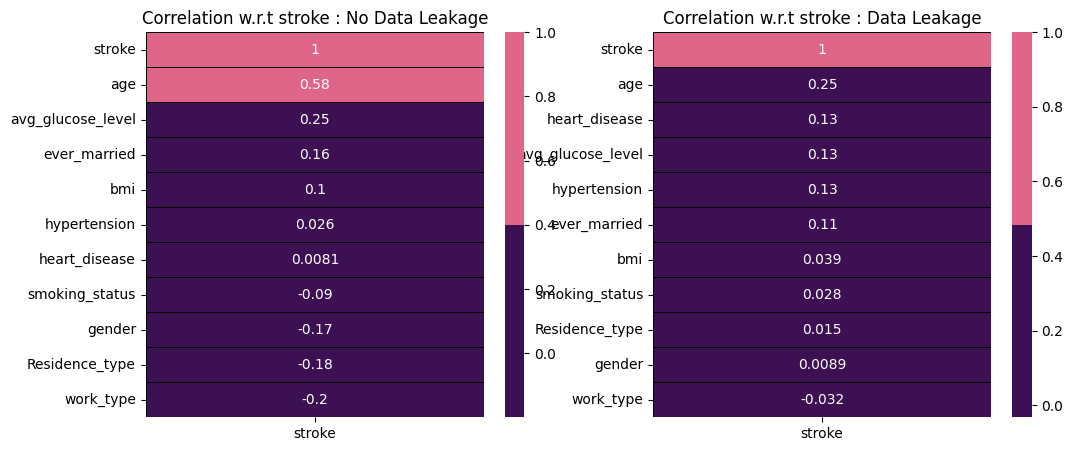

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,5))

plt.subplot(1,2,1)
corr = x_train_test.corrwith(x_train_test['stroke']).sort_values(ascending = False).to_frame()
corr.columns = ['stroke']
sns.heatmap(corr,annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t stroke : No Data Leakage');

plt.subplot(1,2,2)
corr = df1.drop(columns = ['age_group', 'avg_glucose_level_group', 'bmi_group']).corrwith(df1['stroke']).sort_values(ascending = False).to_frame()
corr.columns = ['stroke']
sns.heatmap(corr,annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t stroke : Data Leakage');

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif,chi2

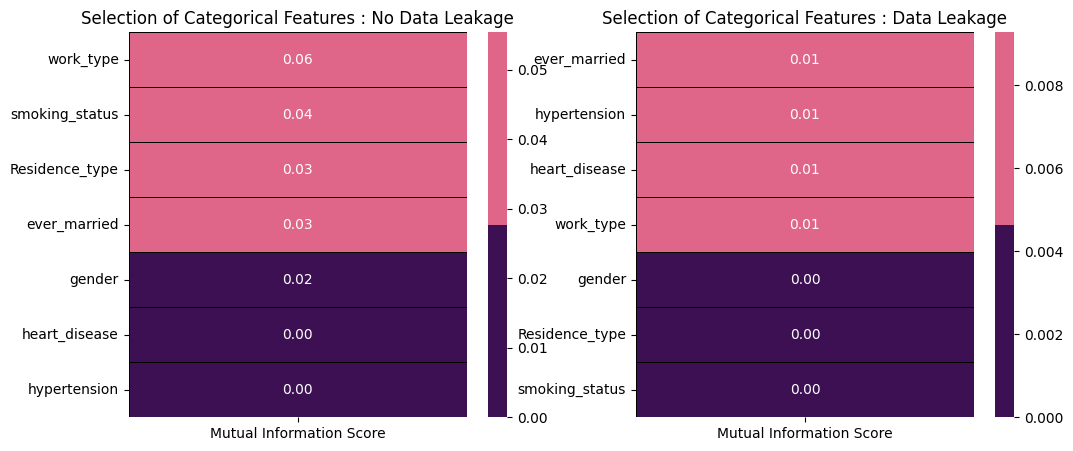

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,5))

plt.subplot(1,2,1)
features = x_train.loc[:,categorical_features]
target = pd.DataFrame(y_train)

best_features = SelectKBest(score_func = mutual_info_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Mutual Information Score'])
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Mutual Information Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features : No Data Leakage');

plt.subplot(1,2,2)
features = df1.loc[:,categorical_features]
target = df1.loc[:,'stroke']

best_features = SelectKBest(score_func = mutual_info_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Mutual Information Score'])
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Mutual Information Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features : Data Leakage');

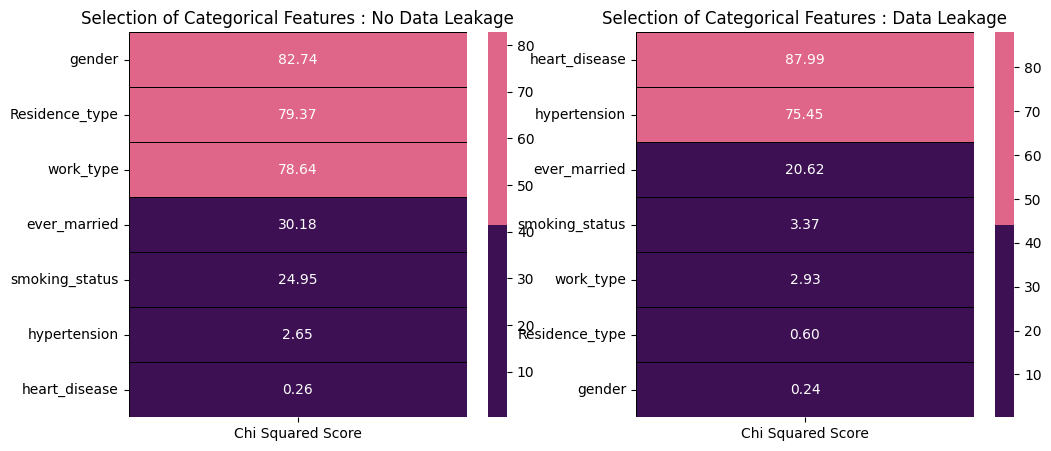

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,5))

plt.subplot(1,2,1)
features = x_train.loc[:,categorical_features]
target = y_train

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score'])
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features : No Data Leakage');

plt.subplot(1,2,2)
features = df1.loc[:,categorical_features]
target = df1.loc[:,'stroke']

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score'])
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features : Data Leakage');

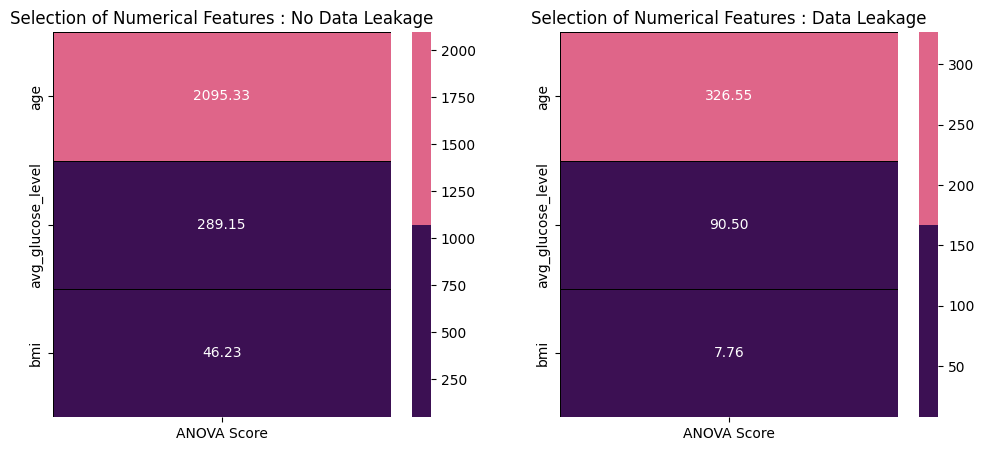

In [ ]:
from sklearn.feature_selection import f_classif

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,5))

plt.subplot(1,2,1)
features = x_train.loc[:,discrete_features]
target = y_train

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score'])
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features : No Data Leakage');

plt.subplot(1,2,2)
features = df1.loc[:,discrete_features]
target = df1.loc[:, 'stroke']

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score'])
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features : Data Leakage');

In [ ]:
# Feature Selection for No Data Leakage :
x_train = x_train.drop(columns = ['smoking_status', 'heart_disease', 'hypertension', 'bmi'])
x_test = x_test.drop(columns = ['smoking_status', 'heart_disease', 'hypertension', 'bmi'])

# Feature Selection for Data Leakage :
df2 = df1.drop(columns = ['smoking_status', 'work_type', 'Residence_type', 'gender',
                          'bmi', 'age_group', 'avg_glucose_level_group', 'bmi_group']).copy(deep = True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

# No Data Leakage :

# Normalization
x_train['age'] = mms.fit_transform(x_train[['age']])
x_test['age'] = mms.transform(x_test[['age']])
x_train['avg_glucose_level'] = mms.fit_transform(x_train[['avg_glucose_level']])
x_test['avg_glucose_level'] = mms.transform(x_test[['avg_glucose_level']])

# Standardization
x_train['gender'] = ss.fit_transform(x_train[['gender']]); x_test['gender'] = ss.transform(x_test[['gender']])
x_train['ever_married'] = ss.fit_transform(x_train[['ever_married']]); x_test['ever_married'] = ss.transform(x_test[['ever_married']])
x_train['work_type'] = ss.fit_transform(x_train[['work_type']]); x_test['work_type'] = ss.transform(x_test[['work_type']])
x_train['Residence_type'] = ss.fit_transform(x_train[['Residence_type']]); x_test['Residence_type'] = ss.transform(x_test[['Residence_type']])

# Data Leakage :

# Normalization
df2['age'] = mms.fit_transform(df2[['age']])
df2['avg_glucose_level'] = mms.fit_transform(df2[['avg_glucose_level']])

# Standardization
df2['hypertension'] = mms.fit_transform(df2[['hypertension']])
df2['heart_disease'] = mms.fit_transform(df2[['heart_disease']])
df2['ever_married'] = mms.fit_transform(df2[['ever_married']])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay # Import RocCurveDisplay instead of plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [ ]:
x_train1, x_test1, y_train1, y_test1 = x_train.values, x_test.values, y_train.values, y_test.values

x_train2, x_test2, y_train2, y_test2 = train_test_split(df2.drop(columns = 'stroke').values, df2['stroke'].values, test_size = 0.15, random_state = 2)

In [ ]:
from sklearn.model_selection import cross_val_predict

def model(classifier, x_train, y_train, x_test, y_test):

    classifier.fit(x_train, y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

    # Use cross_val_predict to get probabilities, but ensure predict_proba exists
    try:
        cv_probs = cross_val_predict(classifier, x_train, y_train, cv=cv, method='predict_proba')
        cv_score = roc_auc_score(y_train, cv_probs[:, 1])  # Assuming binary classification
        print("Cross Validation Score : ", '{0:.2%}'.format(cv_score))
    except AttributeError:
        print("Warning: Classifier does not have 'predict_proba' method. Skipping cross-validation ROC AUC calculation.")

    print("ROC_AUC Score : ", '{0:.2%}'.format(roc_auc_score(y_test, prediction)))

    try:
        RocCurveDisplay.from_estimator(classifier, x_test, y_test)
        plt.title('ROC_AUC_Plot')
        plt.show()
    except AttributeError:
        print("Warning: Classifier does not have 'predict_proba' method. Skipping ROC AUC plot.")

ROC_AUC Score :  82.76%
              precision    recall  f1-score   support

           0       0.87      0.77      0.82       367
           1       0.80      0.89      0.84       380

    accuracy                           0.83       747
   macro avg       0.83      0.83      0.83       747
weighted avg       0.83      0.83      0.83       747



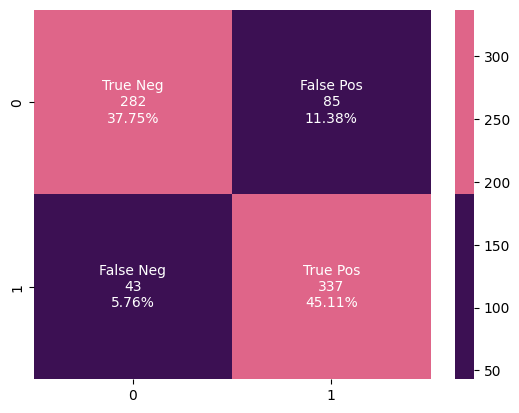

In [ ]:
model(classifier_xgb,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_xgb,x_test1,y_test1)

ROC_AUC Score :  50.00%
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       726
           1       0.00      0.00      0.00        41

    accuracy                           0.95       767
   macro avg       0.47      0.50      0.49       767
weighted avg       0.90      0.95      0.92       767



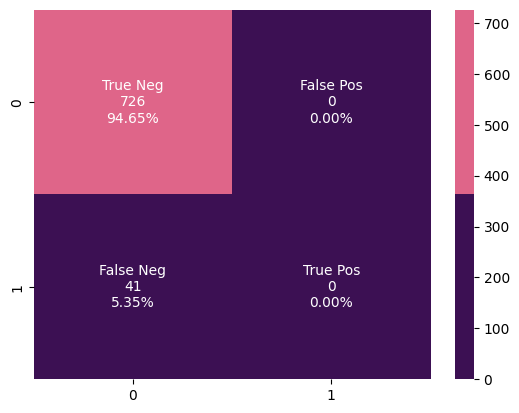

In [ ]:
model(classifier_xgb,x_train2,y_train2,x_test2,y_test2)
model_evaluation(classifier_xgb,x_test2,y_test2)